<a href="https://colab.research.google.com/github/Mubasshir-Ali/Deep_Learning_Practice/blob/master/3_MNIST_Dataset_Image_Classification_With_CNNS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Image Classification with Convolutional Neural Networks


In [1]:
import tensorflow as tf

In [2]:
# Import Tensorflow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
#@title Import The Fashion MNIST Dataset

In [5]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised = True, with_info = True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete5JY2WJ/fashion_mnist-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete5JY2WJ/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [7]:
#@title Explore the data


In [8]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [9]:
#@title Preprocess The Data


In [10]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

In [11]:
#@title Explore The Processed Data


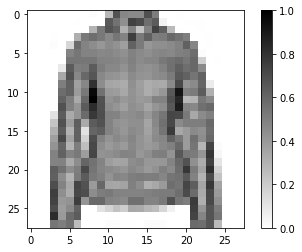

In [12]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

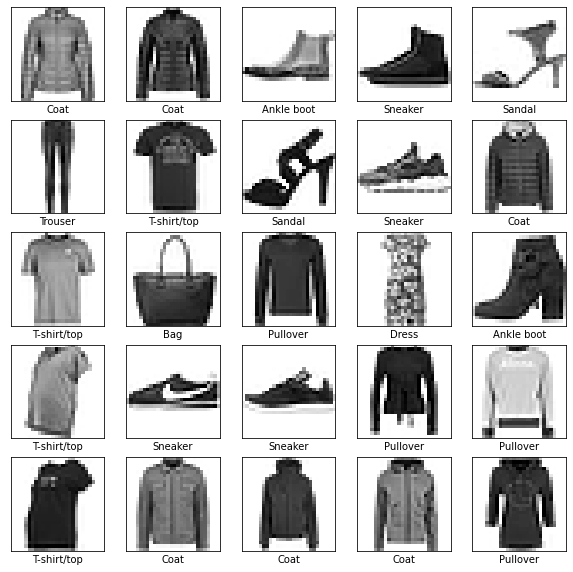

In [13]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [14]:
#@title Build The Model


In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10)
])

In [16]:
#@title Compile The Model


In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
#@title Train The Model


In [19]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [20]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 15s 2ms/step - loss: 0.5369 - accuracy: 0.8062
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2689 - accuracy: 0.9026
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2243 - accuracy: 0.9185
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1940 - accuracy: 0.9285
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1613 - accuracy: 0.9405
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1329 - accuracy: 0.9505
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1105 - accuracy: 0.9587
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0931 - accuracy: 0.9656
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0828 - accuracy: 0.9698
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.06

In [21]:
#@title Evaluate Accuracy


In [38]:
model.fit(test_dataset, epochs=10, steps_per_epoch=math.ceil(num_test_examples/BATCH_SIZE))

test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/10
313/313 [==============================] - 1s 3ms/step - loss: 0.2609 - accuracy: 0.9115
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 0.1487 - accuracy: 0.9431
Epoch 3/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0950 - accuracy: 0.9658
Epoch 4/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0601 - accuracy: 0.9804
Epoch 5/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0405 - accuracy: 0.9886
Epoch 6/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0262 - accuracy: 0.9937
Epoch 7/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0165 - accuracy: 0.9971
Epoch 8/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0128 - accuracy: 0.9971
Epoch 9/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0061 - accuracy: 0.9997
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0309 - accuracy: 0.9899

In [23]:
#@title Make Predictions And Explore


In [24]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

In [25]:
predictions.shape

(32, 10)

In [26]:
predictions[0]

array([ -7.455693  , -15.307518  ,  -0.10393132, -16.77065   ,
         6.530195  , -13.275284  ,   4.664558  , -17.312323  ,
       -14.48898   , -10.505791  ], dtype=float32)

In [27]:
np.argmax(predictions[0])

4

In [28]:
test_labels[0]

4

In [29]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

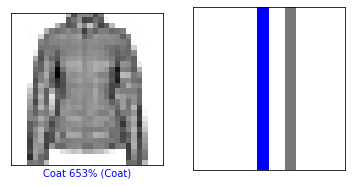

In [30]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

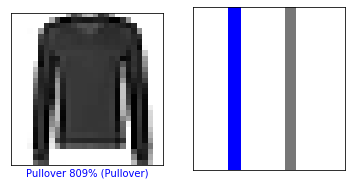

In [31]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

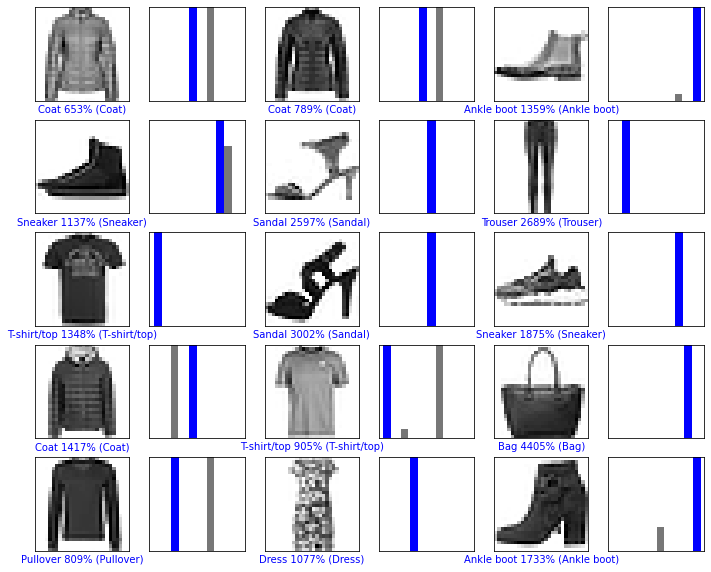

In [32]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [33]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [34]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [35]:
predictions_single = model.predict(img)

print(predictions_single)

[[ -7.455695   -15.307514    -0.10393295 -16.770647     6.530197
  -13.27528      4.6645555  -17.312325   -14.48898    -10.505787  ]]


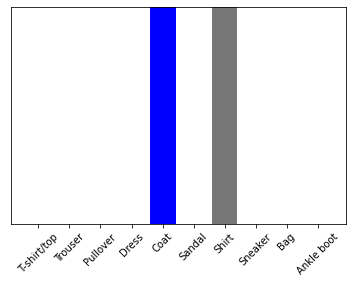

In [36]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [37]:
np.argmax(predictions_single[0])

4